In [1]:
import pymysql
import pandas as pd
import json
import os
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import numpy as np
from scipy import stats
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
from scipy.optimize import minimize
import pickle
from scipy.stats import pearsonr

In [18]:
def calculate_speedup_ratio_amdahl(workload, processors, bottlenecks, task):
    if processors == 1:
        return 0
        
    if task == "dishes":  
        p1 = 0.5 
        p2 = 0.5
        s1 = np.minimum(processors, bottlenecks) / np.minimum(processors-1, bottlenecks)
        s2 = np.minimum(processors, workload) / np.minimum(processors-1, workload)
        speedup = 1 / ((p1/s1) + (p2/s2))

    elif task == "carrots":
        p = 0.5
        s = np.minimum(processors, bottlenecks) / np.minimum(processors-1, bottlenecks)

        speedup = 1 / ((1-p) + (p/s))

    return np.log(1/(speedup * workload))

def calculate_workloadgroupsize_ratio(workload, processors, bottlenecks, task):
    if processors == 1:
        return 0

    return (workload / processors) - (workload / (processors-1))

def group_size_model(group_size):
    return (group_size-1) / (group_size)

def getspeedups(workloads, processors, task, bottleneck, model):
    speedups = {key: [] for key in workloads}
    for p in processors:
        for i in workloads:
            if model == "amdahl":
                speedup = calculate_speedup_ratio_amdahl(i, p, bottleneck, task)
            elif model == "groupsize":
                speedup = group_size_model(p)
            elif model == "workload":
                speedup = 1/i
            speedups[i].append(speedup)
    return speedups

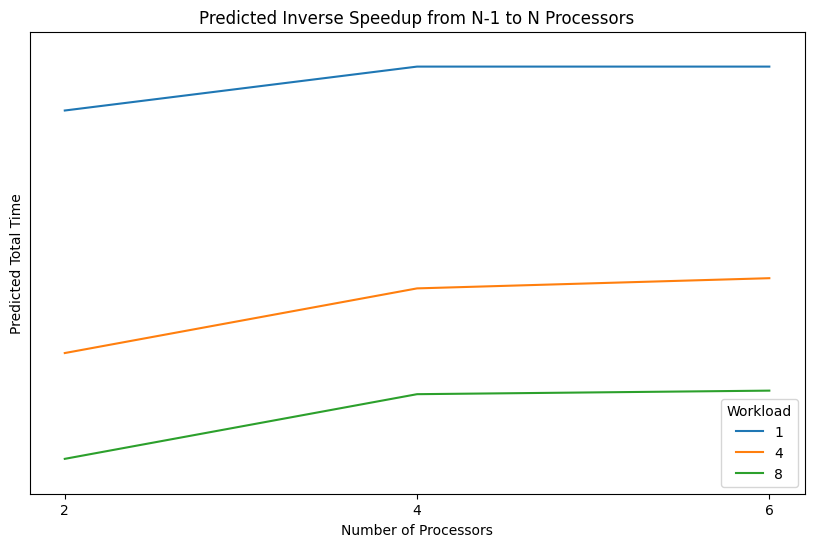

In [8]:
processors = [2,4,6]
workloads = [1,4,8]

dishes_speedups = getspeedups(workloads, processors, "dishes", 2, "amdahl")
carrot_speedups = getspeedups(workloads, processors, "carrots", 2, "amdahl")

plt.figure(figsize=(10, 6))
for workload in dishes_speedups.keys():
    avg_speedups = np.asarray([sum(x) for x in zip(carrot_speedups[workload], dishes_speedups[workload])]) / 2
    plt.plot(processors, avg_speedups, label=f"{workload}", linestyle='-')

plt.xlabel("Number of Processors")
plt.ylabel("Predicted Total Time")
plt.title("Predicted Inverse Speedup from N-1 to N Processors")
plt.legend(title='Workload')
plt.xticks([2.0, 4.0, 6.0])
ymin, ymax = plt.ylim()
plt.ylim(ymin-0.1, ymax+0.1)
plt.yticks([])
plt.show()

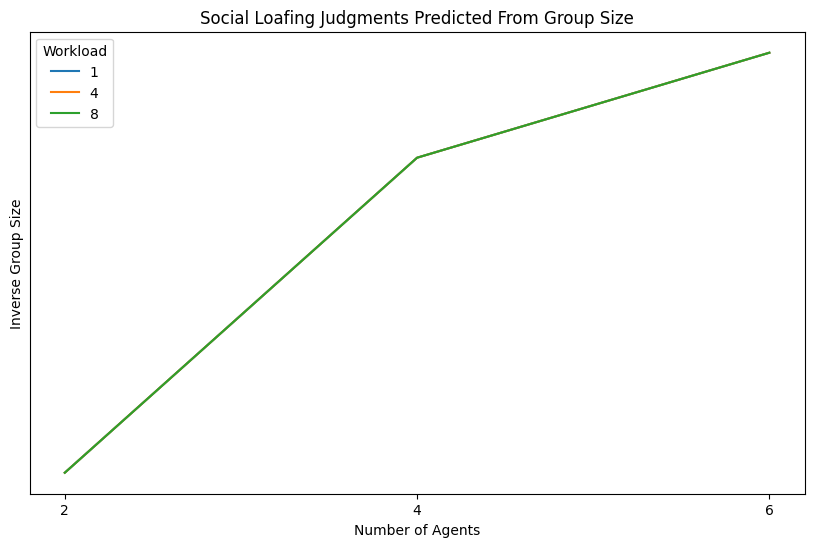

In [10]:
dishes_speedups = getspeedups(workloads, processors, "dishes", 2, "groupsize")
carrot_speedups = getspeedups(workloads, processors, "carrots", 2, "groupsize")

plt.figure(figsize=(10, 6))
for workload in dishes_speedups.keys():
    avg_speedups = np.asarray([sum(x) for x in zip(dishes_speedups[workload], dishes_speedups[workload])]) / 2
    plt.plot(processors, avg_speedups, label=f"{workload}", linestyle='-')

plt.xlabel("Number of Agents")
plt.ylabel("Inverse Group Size")
plt.title("Social Loafing Judgments Predicted From Group Size")
plt.legend(title='Workload')
plt.xticks([2.0, 4.0, 6.0])
plt.yticks([])
plt.show()

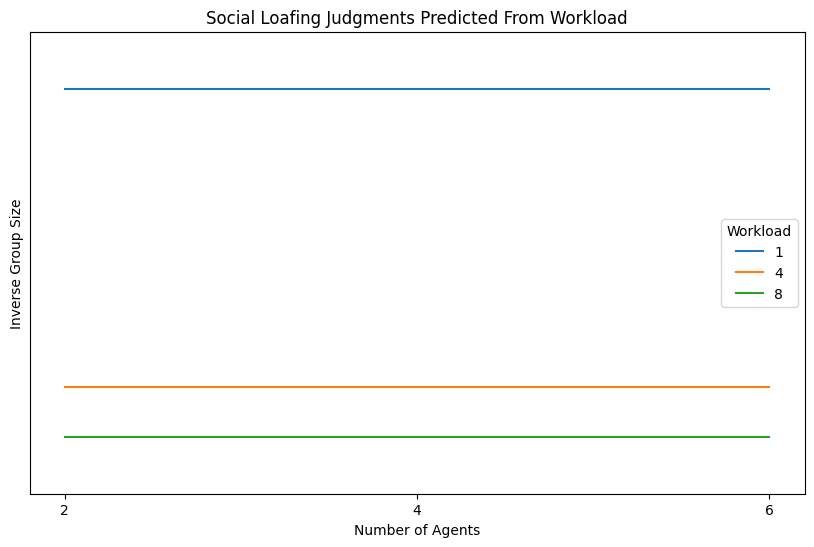

In [17]:
dishes_speedups = getspeedups(workloads, processors, "dishes", 2, "workload")
carrot_speedups = getspeedups(workloads, processors, "carrots", 2, "workload")

plt.figure(figsize=(10, 6))
for workload in dishes_speedups.keys():
    avg_speedups = np.asarray([sum(x) for x in zip(dishes_speedups[workload], dishes_speedups[workload])]) / 2
    plt.plot(processors, avg_speedups, label=f"{workload}", linestyle='-')

plt.xlabel("Number of Agents")
plt.ylabel("Inverse Group Size")
plt.title("Social Loafing Judgments Predicted From Workload")
plt.legend(title='Workload')
plt.xticks([2.0, 4.0, 6.0])
ymin, ymax = plt.ylim()
plt.ylim(ymin-0.1, ymax+0.1)
plt.yticks([])
plt.show()